In [3]:
import pandas as pd
df1 = pd.read_csv("data/raw/shopping_trends.csv")
df2 = pd.read_csv("data/raw/shopping_trends_updated.csv")

In [11]:
df1.shape

(3900, 19)

In [12]:
df2.shape

(3900, 18)

In [13]:
set(df1.columns) - set(df2.columns)

{'Preferred Payment Method'}

We had two datasets: an original (`df1`) and an updated one (`df2`). After checking, we decided to work with the original because it contains the 'Preffered Payment Method' column. From here on, we will refer to it  as `data` for clarity in our analysis.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = df1

In [16]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [17]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   str    
 3   Item Purchased            3900 non-null   str    
 4   Category                  3900 non-null   str    
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   str    
 7   Size                      3900 non-null   str    
 8   Color                     3900 non-null   str    
 9   Season                    3900 non-null   str    
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   str    
 12  Payment Method            3900 non-null   str    
 13  Shipping Type             3900 non-null   str    
 14  Discount Applied   

In [18]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [20]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [22]:
data.duplicated().sum()

np.int64(0)

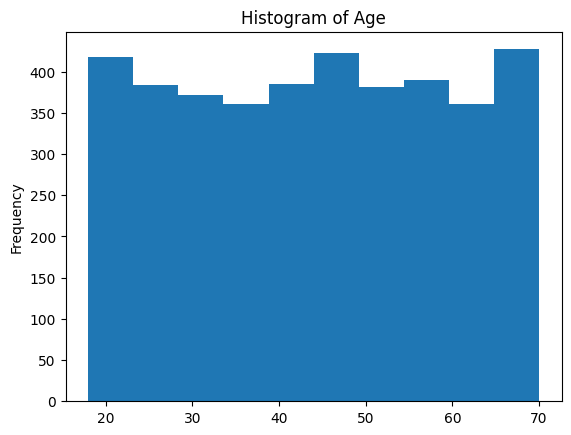

In [24]:
data["Age"].plot(kind = "hist")
plt.title("Histogram of Age")
plt.show()

This histogram shows the distribution of customer ages in the dataset. The ages appear to be fairly evenly distributed between approximately 18 and 70 years old. There is no strong skewness in a specific age range, suggesting that purchases are spread across different age groups. This indicates that the business serves a broad age demographic.

In [25]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='str')

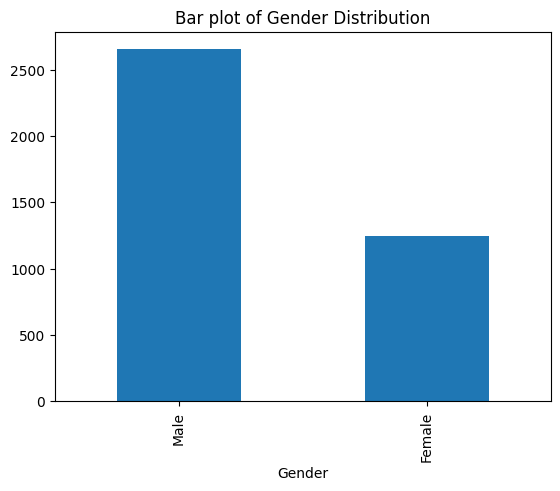

In [28]:
data["Gender"].value_counts().plot(kind = "bar")
plt.title("Bar plot of Gender Distribution")
plt.show()

The bar plot shows the distribution of customers by gender. From the visualization, we observe that the number of male customers is significantly higher than female customers in this dataset. This indicates that the customer base is not evenly distributed by gender, which may influence marketing strategies, product targeting.

In [40]:
data.groupby("Category") ["Purchase Amount (USD)"].mean().sort_values(ascending = False).tail(3)

Category
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [48]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2393,2394,58,Male,Socks,Clothing,97,Louisiana,M,Brown,Winter,5.0,No,Debit Card,2-Day Shipping,No,No,38,PayPal,Every 3 Months
2405,2406,69,Male,Jeans,Clothing,97,California,XL,Silver,Fall,5.0,No,Venmo,Standard,No,No,5,Debit Card,Quarterly
600,601,22,Male,Hat,Accessories,63,South Carolina,M,Charcoal,Spring,5.0,Yes,Debit Card,2-Day Shipping,Yes,Yes,25,Venmo,Monthly
3467,3468,18,Female,Scarf,Accessories,45,Texas,M,Charcoal,Fall,5.0,No,Bank Transfer,Next Day Air,No,No,5,Credit Card,Annually
507,508,65,Male,Shorts,Clothing,20,Maine,M,Magenta,Spring,5.0,Yes,Bank Transfer,Store Pickup,Yes,Yes,33,Debit Card,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2381,41,Male,Scarf,Accessories,66,Pennsylvania,M,Black,Fall,2.5,No,Credit Card,Next Day Air,No,No,36,PayPal,Fortnightly
133,134,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Bank Transfer,Next Day Air,Yes,Yes,25,Venmo,Annually
2724,2725,52,Female,Sneakers,Footwear,91,Missouri,M,Brown,Spring,2.5,No,Bank Transfer,Next Day Air,No,No,11,Debit Card,Fortnightly
1889,1890,59,Male,Skirt,Clothing,57,North Carolina,L,Peach,Spring,2.5,No,Debit Card,Next Day Air,No,No,27,Bank Transfer,Weekly


In [49]:
data.sort_values("Review Rating", ascending = False, inplace = True)

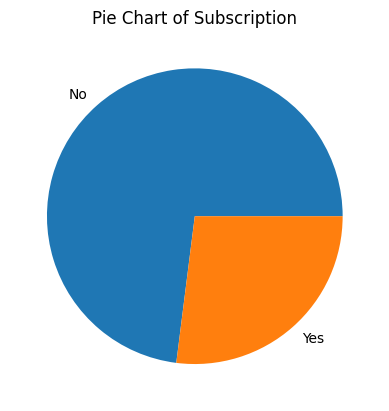

In [55]:
data["Subscription Status"].value_counts().plot(kind = "pie")
plt.title("Pie Chart of Subscription")
plt.show()

<Axes: >

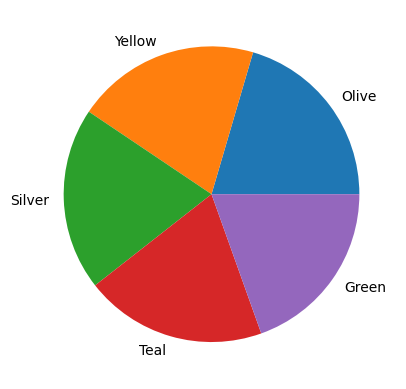

In [57]:
data["Color"].value_counts().head().plot(kind = "pie")

The pie charts represents the five most frequently purchased colors in the dataset. The distribution appears relatively balanced.

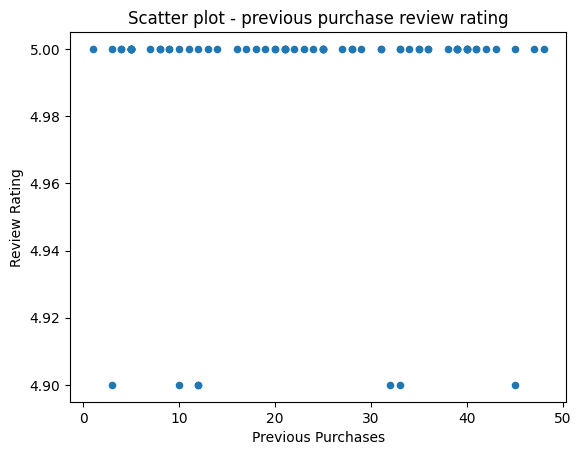

In [60]:
data.head(75).plot(x = "Previous Purchases", y = "Review Rating", kind = "scatter")
plt.title("Scatter plot - previous purchase review rating")
plt.show()

From the visualization, review ratings appear to be consistently high regardless of the number of previous purchases. There doesn't appear any strong relationship or clear trend.  

In [61]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

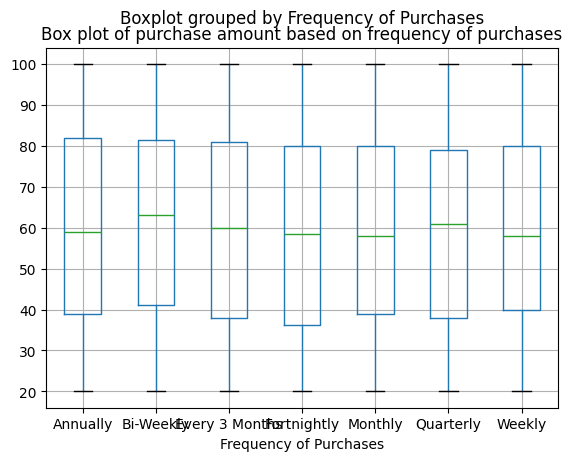

In [62]:
data.boxplot(column = "Purchase Amount (USD)", by ="Frequency of Purchases")
plt.title("Box plot of purchase amount based on frequency of purchases")
plt.show()

This boxplot compares the distribution of purchase amounts across different purchase frequency categories. We can see from the graph that although customers buy at different intervals, the amount spent per purchase remains fairly consistent.

In [65]:
data["Preferred Payment Method"].value_counts().sort_values(ascending = False).head(1)

Preferred Payment Method
PayPal    677
Name: count, dtype: int64

In [68]:
pd.pivot_table(data, values = "Purchase Amount (USD)", index = "Location", columns = "Item Purchased", aggfunc= "mean").head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [69]:
data.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [72]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

In [73]:
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [74]:
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [75]:
data.groupby("Frequency of Purchases")["Previous Purchases"].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [76]:
data.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

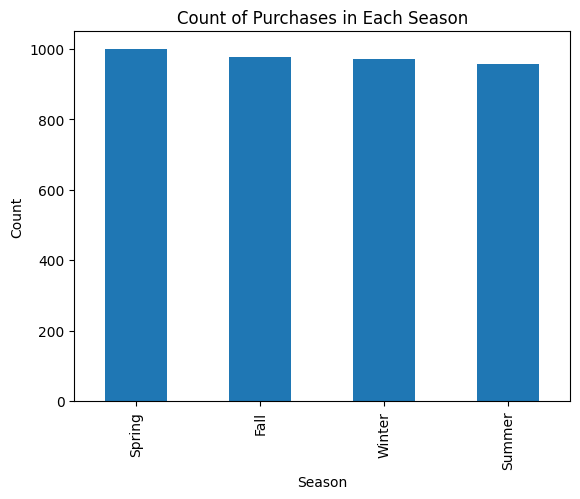

In [78]:
data["Season"].value_counts().plot(kind = "bar")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Purchases in Each Season")
plt.show()

This bar chart shows the number of purchases made in each season. Here again the distribution appears relatively balanced across Spring, Fall, Winter, and Summer.

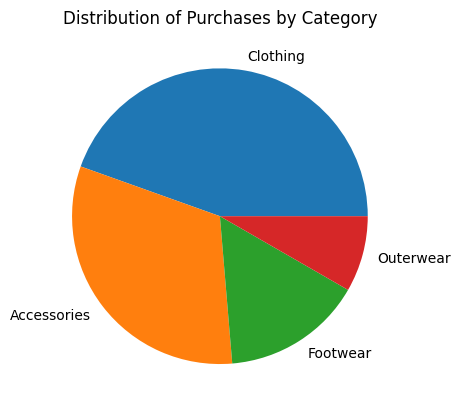

In [79]:
data["Category"].value_counts().plot(kind = "pie")
plt.title("Distribution of Purchases by Category")
plt.show()

This pie chart illustrates the proportion of purchases across different product categories. Clothing represents the largest share of purchases, followed by Accessories. Footwear have a medium share, and outerwear has the lowest share. This suggests that Clothing is the major revenue-driving category and may represent the core focus of customer demand.

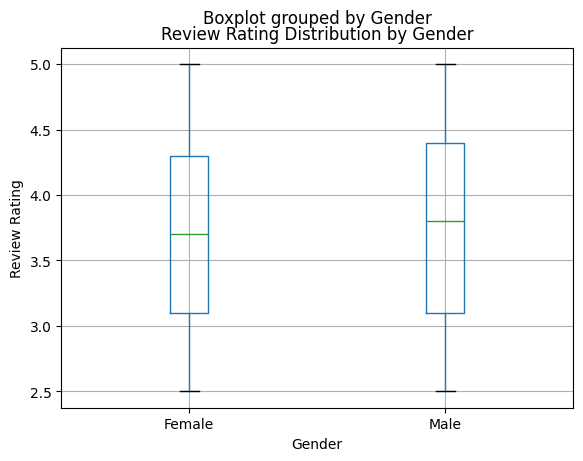

In [80]:
data.boxplot(column = "Review Rating", by = "Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution by Gender")
plt.show()

This boxplot compares review rating distributions between male and female customers. The median ratings for both genders are very similar. This suggests that customer satisfaction, as measured by review ratings, does not differ significantly by gender.

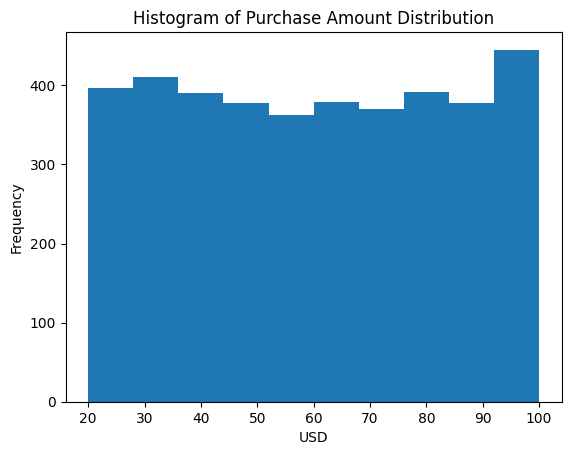

In [81]:
data["Purchase Amount (USD)"].plot(kind = "hist", bins = 10)
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Histogram of Purchase Amount Distribution")
plt.show()

This histogram shows the distribution of purchase amounts in USD. Purchase values range approximately from 20 to 100 USD. There is no strong skewness or extreme concentration in a specific price range.

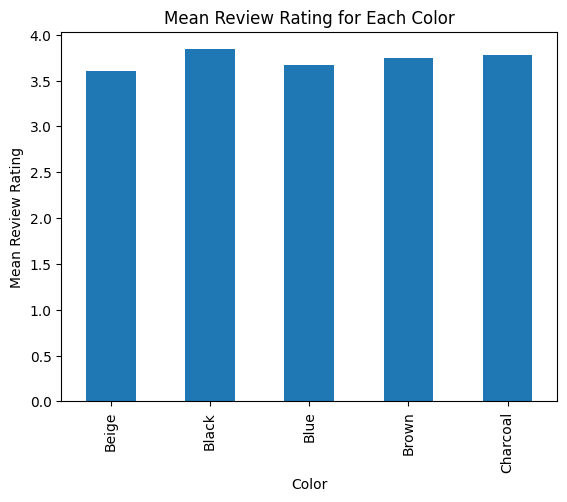

In [83]:
data.groupby("Color")["Review Rating"].mean().head().plot(kind = "bar")
plt.xlabel("Color")
plt.ylabel("Mean Review Rating")
plt.title("Mean Review Rating for Each Color")
plt.show()

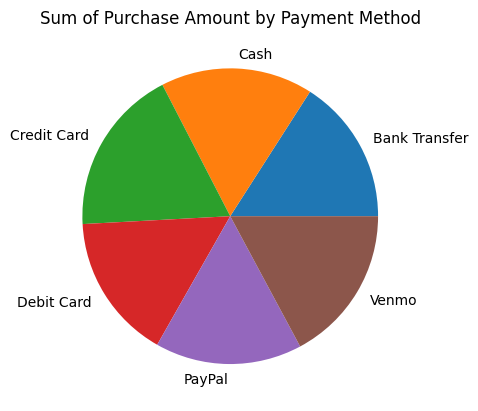

In [86]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind = "pie")
plt.title("Sum of Purchase Amount by Payment Method")
plt.show()

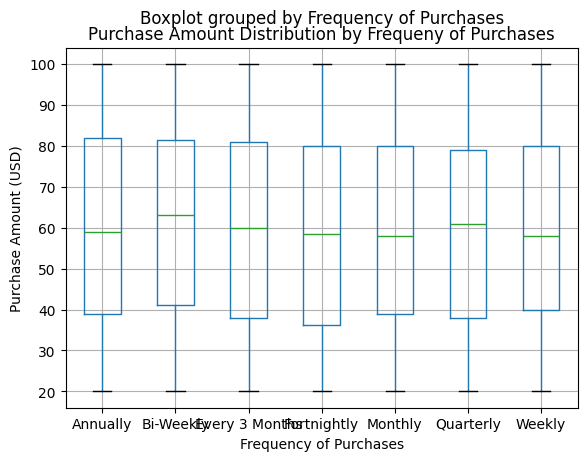

In [87]:
data.boxplot(column= "Purchase Amount (USD)", by = "Frequency of Purchases")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Purchase Amount Distribution by Frequeny of Purchases")
plt.show()

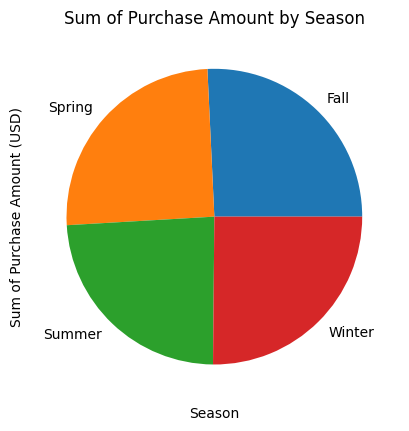

In [88]:
data.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind = "pie")
plt.xlabel("Season")
plt.ylabel("Sum of Purchase Amount (USD)")
plt.title("Sum of Purchase Amount by Season")
plt.show()